In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [64]:
# Define the feedforward neural network model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(32, activation='leaky_relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [65]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
# Train the model
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9292 - accuracy: 0.3003 - val_loss: 1.7581 - val_accuracy: 0.3590
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7591 - accuracy: 0.3672 - val_loss: 1.6710 - val_accuracy: 0.3996
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6824 - accuracy: 0.3972 - val_loss: 1.6160 - val_accuracy: 0.4198
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6363 - accuracy: 0.4150 - val_loss: 1.6058 - val_accuracy: 0.4373
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6041 - accuracy: 0.4274 - val_loss: 1.5822 - val_accuracy: 0.4360
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5793 - accuracy: 0.4362 - val_loss: 1.5535 - val_accuracy: 0.4382
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5605 - accuracy: 0.4424 - val_loss: 1.5205 - val_accuracy:

In [67]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.4559 - accuracy: 0.4825
Test accuracy: 0.48249998688697815


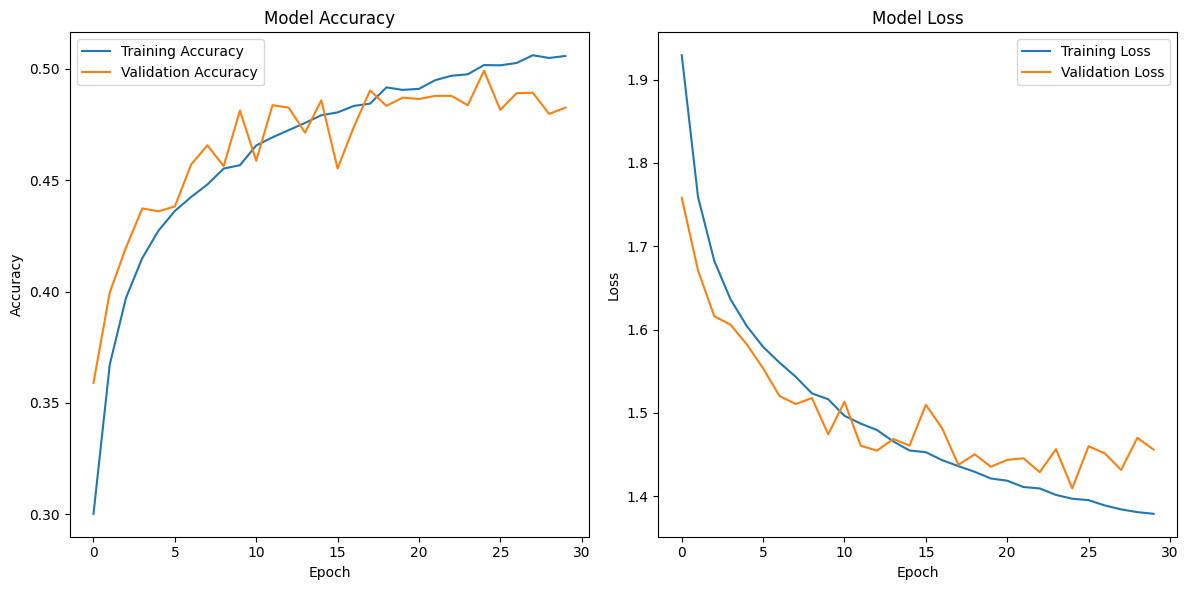

In [68]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()